In [1]:
import numpy as np
import matplotlib.pyplot as plt

## PUNTO 1

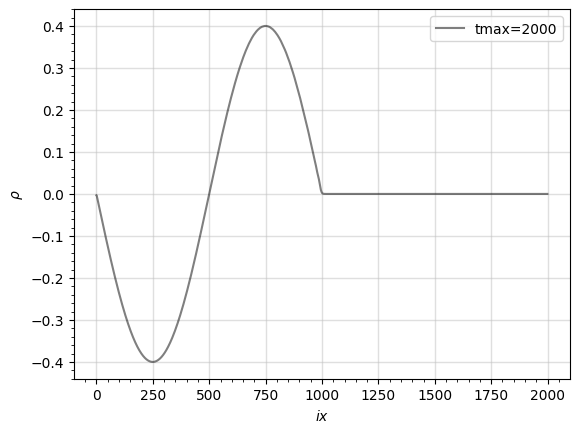

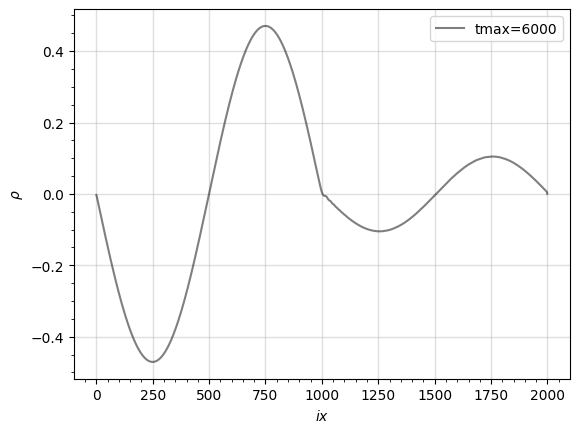

In [2]:
Densidades6000 = np.genfromtxt('Punto 1_6000t.dat', delimiter=' ', usecols=(0, 1))
Densidades2000 = np.genfromtxt('Punto 1_2000t.dat', delimiter=' ', usecols=(0, 1))


plt.plot(Densidades2000[:,0],Densidades2000[:,1],'-', color='Black', alpha=0.5, label='tmax=2000')
plt.xlabel(r'$ix$')
plt.ylabel(r'$\rho$')
plt.grid(color='#c0c0c0', linewidth=1,alpha=0.5)
plt.minorticks_on()
plt.legend()
plt.show()

plt.plot(Densidades6000[:,0],Densidades6000[:,1],'-', color='Black', alpha=0.5, label='tmax=6000')
plt.xlabel(r'$ix$')
plt.ylabel(r'$\rho$')
plt.grid(color='#c0c0c0', linewidth=1,alpha=0.5)
plt.minorticks_on()
plt.legend()
plt.show()

## PUNTO 2

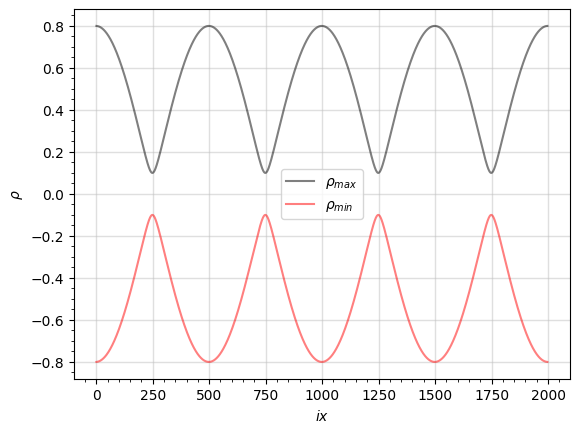

In [3]:
Rhomax = np.genfromtxt('Punto 2_Rhomax.dat', delimiter=' ', usecols=(0, 1))
Rhomin = np.genfromtxt('Punto 2_Rhomin.dat', delimiter=' ', usecols=(0, 1))

plt.plot(Rhomax[1:-2,0],Rhomax[1:-2,1],'-', color='Black', alpha=0.5, label=r'$\rho_{max}$')
plt.plot(Rhomin[1:-2,0],Rhomin[1:-2,1],'-', color='Red', alpha=0.5, label=r'$\rho_{min}$')
plt.xlabel(r'$ix$')
plt.ylabel(r'$\rho$')
plt.grid(color='#c0c0c0', linewidth=1,alpha=0.5)
plt.minorticks_on()
plt.legend()
plt.show()

## PUNTO 3

In [4]:
Punto3_Rhomax = np.genfromtxt('Punto 3.dat', delimiter=' ', usecols=(1))

D = 0.4
Amax = np.max(Punto3_Rhomax[1:-2])
Amin = np.min(Punto3_Rhomax[1:-2])
SWR = Amax/Amin

C = (4*SWR)/((SWR+1)**2)

print(f"D = {D}")
print(f"SWR = {SWR}")
print(f"C = {C}")


D = 0.4
SWR = 4.666393349732349
C = 0.5813369096891371


## PUNTO 4

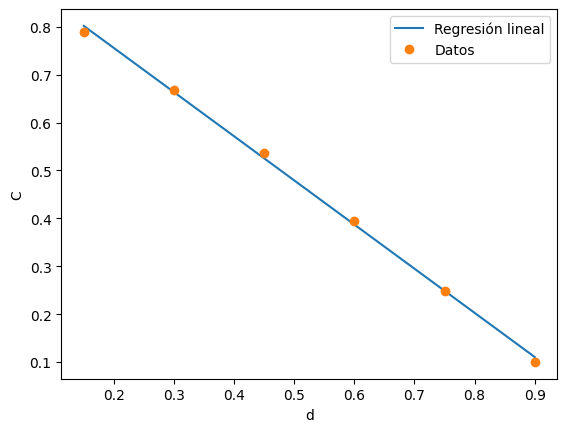

El coeficiente de absorcion tiene una relacion lineal con D dada por la siguiente ecuacione: C = -0.922x+0.940


In [5]:
def C_absorcion(x):
    Amax = np.max(x[1:-2])
    Amin = np.min(x[1:-2])
    SWR = Amax/Amin
    C = (4*SWR)/((SWR+1)**2)

    return C

d = np.array((0.15, 0.3, 0.45, 0.6, 0.75, 0.9))

D_015=np.genfromtxt('Punto 4_0.15.dat', delimiter=' ', usecols=(1))
D_03=np.genfromtxt('Punto 4_0.3.dat', delimiter=' ', usecols=(1))
D_045=np.genfromtxt('Punto 4_0.45.dat', delimiter=' ', usecols=(1))
D_06=np.genfromtxt('Punto 4_0.6.dat', delimiter=' ', usecols=(1))
D_075=np.genfromtxt('Punto 4_0.75.dat', delimiter=' ', usecols=(1))
D_09=np.genfromtxt('Punto 4_0.9.dat', delimiter=' ', usecols=(1))

c = np.array((C_absorcion(D_015), C_absorcion(D_03), C_absorcion(D_045), C_absorcion(D_06), C_absorcion(D_075), C_absorcion(D_09), ))

# Realizar regresión lineal
z = np.polyfit(d, c, 1) # 1 es el grado de la regresión (lineal)
p = np.poly1d(z)

pendiente = z[0]
punto_corte = z[1]


# Plotear la regresión lineal
xp = np.linspace(d.min(), d.max(), 100)
plt.plot(xp, p(xp), "-", label="Regresión lineal")

# Plotear los puntos originales
plt.plot(d, c, 'o', label="Datos")

plt.xlabel("d")
plt.ylabel("C")
plt.legend()
plt.show()


print(f'El coeficiente de absorcion tiene una relacion lineal con D dada por la siguiente ecuacione: C = {pendiente:.3f}x+{punto_corte:.3f}')
